# Importing Datasets




In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Making Synthetic Dtaset for K-Means

In [ ]:
features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)
#to make a dataset specific for clustering
#centres-no of clusters

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

# Scaling the Features

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

# Fitting the K-Means Model



In [ ]:
kmeans = KMeans(init="random",n_clusters = 3,n_init = 10, max_iter = 300, random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_
#lowest sse value

74.57960106819854

In [ ]:
kmeans.cluster_centers_
#cluster centroids

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [ ]:
kmeans.n_iter_
#no if iterations it took to converge

2

# Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

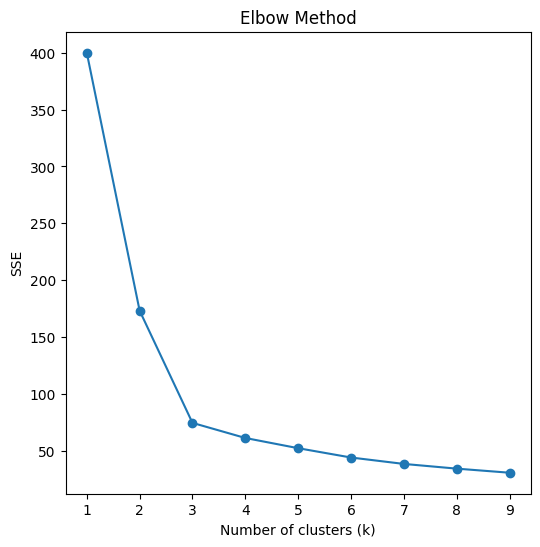

In [ ]:
# sse = []
# for i in range(1,10):
#   km = KMeans(n_clusters = i)
#   km.fit(scaled_features)
#   sse.append(km.inertia_)

# print(sse)

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_features)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="SSE")
plt.title(label="Elbow Method")
plt.show()

# Silhouette Method


In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

In [ ]:
silhouette_coef = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features,kmeans.labels_)
  silhouette_coef.append(score)

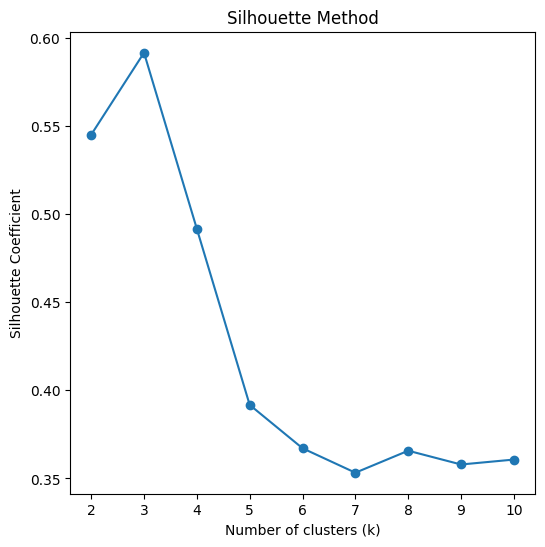

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_coef, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="Silhouette Coefficient")
plt.title(label="Silhouette Method")
plt.show()

# Pipeline Creation

In [ ]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
%matplotlib inline

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

r = urllib.request.urlretrieve(full_download_url, archive_name)

tar = tarfile.open(archive_name,"r:gz")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x7f4a04a13130>>

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile, delimiter=",", usecols=range(1, 20532), skip_header=1)
true_label_names =np.genfromtxt(labels_file, delimiter=",", usecols=(1, ), skip_header=1, dtype= "str")

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
n_clusters = len(label_encoder.classes_)
preprocessor = Pipeline([("scaler",MinMaxScaler()),("pca",PCA(n_components=2,random_state=42))])
clusterer = Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

# Titanic Dataset

In [ ]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
numeric_cols_train = train.select_dtypes(include=[np.number])
train.fillna(numeric_cols_train.mean(), inplace=True)

numeric_cols_test = test.select_dtypes(include=[np.number])
test.fillna(numeric_cols_test.mean(), inplace=True)


In [ ]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)


In [ ]:
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
test["Sex"] = le.transform(test["Sex"])

In [ ]:
features = train[["Age","Sex","Pclass"]].values
kmeans = KMeans(init="random",n_clusters = 3,n_init = 10, max_iter = 300, random_state=42)
kmeans.fit(features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[23.91304348,  0.62608696,  2.40869565],
       [35.1978022 ,  0.64835165,  1.98901099],
       [72.35714286,  1.        ,  1.71428571],
       [19.12019231,  0.66346154,  2.53846154],
       [60.22727273,  0.72727273,  1.48484848],
       [14.40789474,  0.5       ,  2.57894737],
       [42.01265823,  0.62025316,  2.08860759],
       [29.58468363,  0.6875    ,  2.48355263],
       [50.22413793,  0.63793103,  1.60344828],
       [ 4.0833871 ,  0.51612903,  2.62903226]])

In [ ]:
kmeans.inertia_

3469.4336474433767

In [ ]:
kmeans = KMeans(init="random",n_clusters = 2,n_init = 10, max_iter = 300, random_state=42)
kmeans.fit(features)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

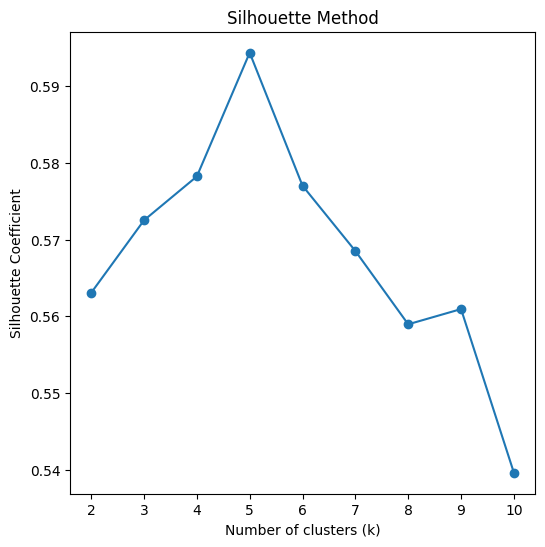

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
silhouette_coef = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coef.append(score)

plt.figure(figsize=(6, 6))
plt.plot(range(2, 11), silhouette_coef, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="Silhouette Coefficient")
plt.title(label="Silhouette Method")
plt.show()

By examining the silhouette scores for different numbers of clusters, we identify the point where the average silhouette score peaks i.e when the kmeans has 5 clusters. This peak represents the optimal number of clusters, as it indicates the highest overall similarity within clusters and the greatest dissimilarity between clusters. Beyond this point, adding more clusters doesn't significantly improve the overall clustering quality, as indicated by the silhouette scores plateauing or decreasing.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

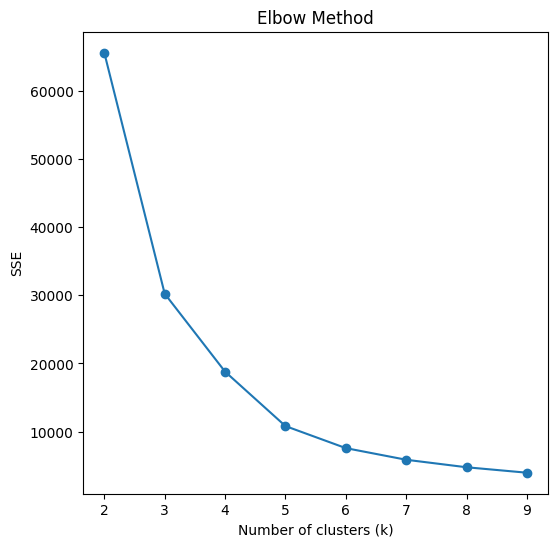

In [ ]:
list_k = list(range(2, 10))
sse = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(features)
    sse.append(km.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(xlabel="Number of clusters (k)")
plt.ylabel(ylabel="SSE")
plt.title(label="Elbow Method")
plt.show()

Based on the Elbow Method analysis, it's determined that the optimal number of clusters for the given dataset is 5. This conclusion is drawn because beyond 5 clusters, the reduction in Sum of Squared Errors (SSE) becomes insignificant, indicating diminishing returns in terms of cluster refinement. Thus, 5 clusters provide a balance between capturing meaningful patterns in the data and avoiding unnecessary complexity.